In [1]:
# First attach your google drive to the colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [124]:
!pip3 install 'h5py==2.10.0' --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tensorflow 1

In [2]:
import cv2
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import json
import pandas as pd

from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize

##Visualizing & Understanding dataset



In [3]:
import os
import sys
import zipfile
import glob
from scipy.io import loadmat
import scipy.io as sio

In [54]:
# first, we shall set the image tile, WSI and output paths.

tile_path = '/content/drive/MyDrive/CV/ugh/CoNSeP/Train/Images/'
tile_mat_path = '/content/drive/MyDrive/CV/ugh/CoNSeP/Train/Labels/'
tile_overlay_path = '/content/drive/MyDrive/CV/ugh/CoNSeP/Train/Overlay/'

In [53]:
# load the original image, the `.mat` file and the overlay

image_list = glob.glob(tile_path + '*.png')
ext = ['png']
#image_list = (glob.glob(title_path + '*.' + e) for e in ext)
image_list.sort()

# get a random image 
rand_nr = np.random.randint(0,len(image_list))
image_file = image_list[rand_nr]

basename = os.path.basename(image_file)
image_ext = basename.split('.')[-1]
basename = basename[:-(len(image_ext)+1)]

image = cv2.imread(image_file)
# convert from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# get the corresponding `.mat` file 
result_mat = sio.loadmat(tile_mat_path + basename + '.mat')

# get the overlay
overlay = cv2.imread(tile_overlay_path + basename + '.png')
overlay = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)

ValueError: ignored

In [7]:
print(image_list)

['/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_1.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_10.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_11.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_12.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_13.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_14.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_15.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_16.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_17.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_18.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_19.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_2.png', '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_20.png', '/content/dri

In [9]:
print(result_mat)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 15 00:21:33 2020', '__version__': '1.0', '__globals__': [], 'inst_map': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'type_map': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'inst_type': array([[6.],
       [6.],
       [6.],
       ...,
       [5.],
       [5.],
       [5.]]), 'inst_centroid': array([[385.05217391,  50.17681159],
       [456.59477756,  94.68955513],
       [522.63751215,  67.29251701],
       ...,
       [399.94444444, 811.77777778],
       [760.68571429, 781.94285714],
       [964.76      , 927.2       ]])}


In [10]:
# ** now, let's get the outputs and print some basic shape information
# 2D map where each nucleus has a unique ID assigned. 0 is background
inst_map = result_mat['inst_map'] 
print(inst_map)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
# Nx2 length array denoting nuclear type predictions. N is the number of nuclei
# idx=0 denotes the corresponding inst_id in the `inst_map` and 
# idx=1 denotes the type of that inst_id
inst_type = result_mat['inst_type'] 
print(inst_type)

[[6.]
 [6.]
 [6.]
 ...
 [5.]
 [5.]
 [5.]]


In [12]:
print('instance map shape', inst_map.shape)

instance map shape (1000, 1000)


In [13]:
print('overlay shape', overlay.shape)

overlay shape (1000, 1000, 3)


In [14]:
print('number of type predictions', len(np.unique(inst_type)))

number of type predictions 5


In [15]:
# double check the number of instances is the same as the number of type predictions
print('number of instances', len(np.unique(inst_map)[1:].tolist()))

number of instances 1242


In [16]:
inst_cent = result_mat['inst_centroid']

In [17]:
print(inst_cent.shape)

(1242, 2)


In [18]:
print("Image Count: {}".format(len(image_list)))

Image Count: 27


In [19]:
print("Class Count: {}".format(len(result_mat)))

Class Count: 7


In [20]:
print(result_mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'inst_map', 'type_map', 'inst_type', 'inst_centroid'])


Reference: https://github.com/matterport/Mask_RCNN/blob/master/samples/nucleus/inspect_nucleus_data.ipynb

In [21]:
import PIL
image2 = PIL.Image.open("/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/train_16.png")
#image to open

width, height = image2.size
#extract width and height from output tuple

print(width, height)

1000 1000


Reference: https://www.codegrepper.com/code-examples/python/how+to+check+the+dimensions+of+an+image+python

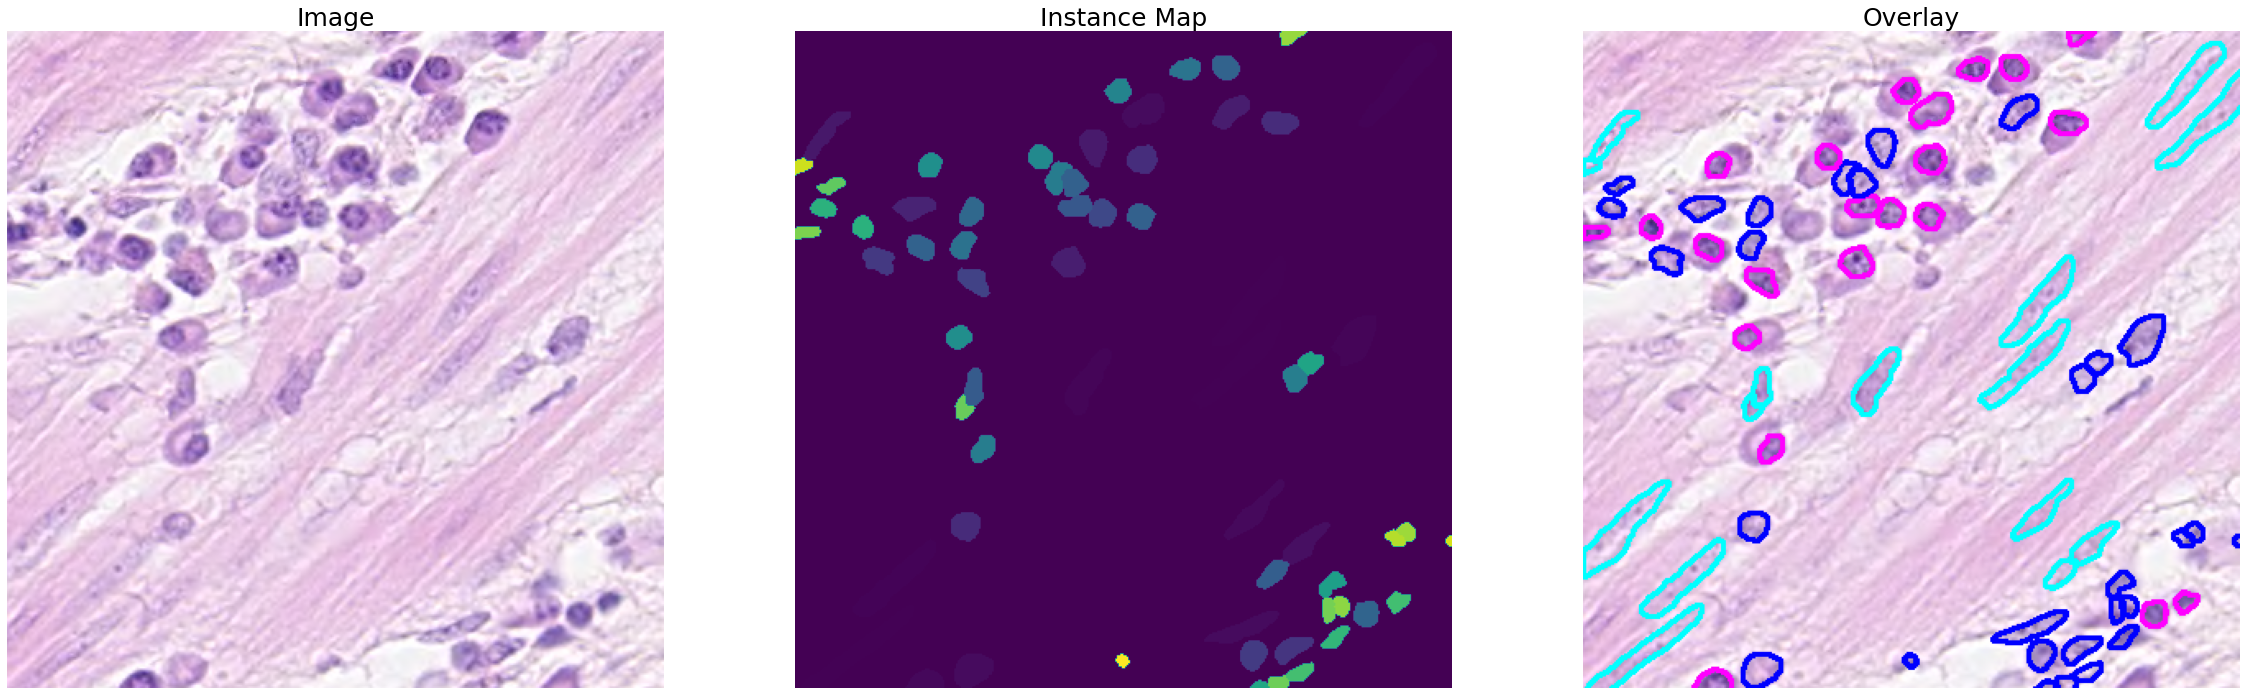

In [22]:
# plot the original image, along with the instance map and the overlay

plt.figure(figsize=(40,20))

plt.subplot(1,3,1)
plt.imshow(image[:400,:400,:])
plt.axis('off')
plt.title('Image', fontsize=25)

plt.subplot(1,3,2)
plt.imshow(inst_map[:400,:400])
plt.axis('off')
plt.title('Instance Map', fontsize=25)

plt.subplot(1,3,3)
plt.imshow(overlay[:400,:400,:])
plt.axis('off')
plt
plt.title('Overlay', fontsize=25)

plt.show()

In [23]:
# let's inspect the inst_type output

print(np.unique(inst_type))

[1. 2. 5. 6. 7.]


We observe that the values range from 0 (background) to N where N is the number of classes.

Refrence: https://github.com/vqdang/hover_net/blob/master/examples/usage.ipynb

## Preparing for Mask RCNN

In [126]:
# go to main directory to install requirements and dependencies 
os.chdir('/content/drive/MyDrive/CV/ugh/')

In [125]:
!python3 setup.py install

running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest file 'mask_rcnn.egg-info/SOURCES.txt'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/__init__.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/visualize.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/utils.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/config.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/parallel_model.py -> build/bdist.linux-x86_64/egg/mrcnn
copying build/lib/mrcnn/model.py -> build/bdist.linux-x86_64/egg/mrcnn
byte-compiling build/bdist.linux-x86_64/egg/mrcnn/__init_

In [127]:
!pip3 install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [128]:
# for mrcnn pretrained weights
from mrcnn.config import Config
from mrcnn import utils
#import mrcnn.model as modellib
from mrcnn import visualize
#from mrcnn.model import log

%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

Reference: https://colab.research.google.com/github/sohiniroych/MaskRCNN_Medical_Image/blob/main/AIS_mask_RCNN_cell_nucleus_google_colab.ipynb


## Configurations

In [131]:
class Configss(Config):
    # name of the configuration
    NAME = "cpm_cfg"
    
    #  background class + 1 class
    NUM_CLASSES = 1 + 1
    
    # steps per epoch and minimum confidence
    STEPS_PER_EPOCH = 160
    
    # learning rate and momentum
    LEARNING_RATE=0.002
    LEARNING_MOMENTUM = 0.8
    
    # regularization penalty
    WEIGHT_DECAY = 0.0001
    
    # image size is controlled by this parameter
    IMAGE_MIN_DIM = 512
    
    # validation steps
    VALIDATION_STEPS = 50
    
    # number of Region of Interest generated per image
    Train_ROIs_Per_Image = 200
    
    # RPN Acnhor scales and ratios to find ROI
    RPN_ANCHOR_SCALES = (16, 32, 48, 64, 128)
    RPN_ANCHOR_RATIOS = [0.5, 1, 1.5]

In [132]:
config = Configss()

In [61]:
class NucleusConfig(Config):
    """Configuration for training on the nucleus segmentation dataset."""
    # Give the configuration a recognizable name
    NAME = "nucleus"

    # Adjust depending on your GPU memory
    IMAGES_PER_GPU = 6

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # Background + nucleus

    # Number of training and validation steps per epoch
    STEPS_PER_EPOCH = (657 - len(VAL_IMAGE_IDS)) // IMAGES_PER_GPU
    VALIDATION_STEPS = max(1, len(VAL_IMAGE_IDS) // IMAGES_PER_GPU)

    # Don't exclude based on confidence. Since we have two classes
    # then 0.5 is the minimum anyway as it picks between nucleus and BG
    DETECTION_MIN_CONFIDENCE = 0

    # Backbone network architecture
    # Supported values are: resnet50, resnet101
    BACKBONE = "resnet50"

    # Input image resizing
    # Random crops of size 512x512
    IMAGE_RESIZE_MODE = "crop"
    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 512
    IMAGE_MIN_SCALE = 2.0

    # Length of square anchor side in pixels
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)

    # ROIs kept after non-maximum supression (training and inference)
    POST_NMS_ROIS_TRAINING = 1000
    POST_NMS_ROIS_INFERENCE = 2000

    # Non-max suppression threshold to filter RPN proposals.
    # You can increase this during training to generate more propsals.
    RPN_NMS_THRESHOLD = 0.9

    # How many anchors per image to use for RPN training
    RPN_TRAIN_ANCHORS_PER_IMAGE = 64

    # Image mean (RGB)
    MEAN_PIXEL = np.array([43.53, 39.56, 48.22])

    # If enabled, resizes instance masks to a smaller size to reduce
    # memory load. Recommended when using high-resolution images.
    USE_MINI_MASK = True
    MINI_MASK_SHAPE = (56, 56)  # (height, width) of the mini-mask

    # Number of ROIs per image to feed to classifier/mask heads
    # The Mask RCNN paper uses 512 but often the RPN doesn't generate
    # enough positive proposals to fill this and keep a positive:negative
    # ratio of 1:3. You can increase the number of proposals by adjusting
    # the RPN NMS threshold.
    TRAIN_ROIS_PER_IMAGE = 128

    # Maximum number of ground truth instances to use in one image
    MAX_GT_INSTANCES = 200

    # Max number of final detections per image
    DETECTION_MAX_INSTANCES = 400

In [62]:
class NucleusInferenceConfig(NucleusConfig):
    # Set batch size to 1 to run one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # Don't resize imager for inferencing
    IMAGE_RESIZE_MODE = "pad64"
    # Non-max suppression threshold to filter RPN proposals.
    # You can increase this during training to generate more propsals.
    RPN_NMS_THRESHOLD = 0.7

In [112]:
config = NucleusConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     6
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 6
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                2.0
IMAGE_RESIZE_MODE              crop
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                

Reference: https://github.com/matterport/Mask_RCNN/blob/master/samples/nucleus/nucleus.py


## DataLoading

In [64]:
# for training validation split:
# 27*(30/100)=8
# So we will use 8 images from original training set for validation and the rest shall remain as new training set images.
VAL_IMAGE_IDS=[
               "train_3",
               "train_6",
               "train_9",
               "train_12",
               "train_15",
               "train_18",
               "train_21",
               "train_24"
]

In [113]:
# importing from mrcnn folder
#from mrcnn.utils import Dataset
from mrcnn import utils
from mrcnn import config
#from mrcnn.config import Config
#from mrcnn.model import MaskRCNN
#from mrcnn.visualize import display_instances
from mrcnn import visualize
#from mrcnn.utils import extract_bboxes
#from mrcnn.utils import compute_ap
#from mrcnn.model import load_image_gt
#from mrcnn.model import mold_image

In [66]:
import scipy.io as sio
from skimage import data, io, util

In [18]:
!pip install scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
class CustomDataset(utils.Dataset):

    def load_custom(self, dataset_dir, mode):
        """Load a subset of the Horse-Man dataset.
        dataset_dir: Root directory of the dataset.
        subset: Subset to load: train or val
        """
        # Add classes. We have 7 to add.
        self.add_class("object", 1, "nucleus")
        self.add_class("object", 2, "inflammatory")
        self.add_class("object", 3, "healthy epithelial")
        self.add_class("object", 4, "dysplastic/malignant epithelial")
        self.add_class("object", 5, "fibroblast")
        self.add_class("object", 6, "muscle")
        self.add_class("object", 7, "endothelial")
        dataset_dir= '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images'

        # Which subset?
        # "val": use hard-coded list above
        # "train": use data from stage1_train minus the hard-coded list above
        # else: use the data from the specified sub-directory
        #assert subset in ["train", "val", "Train", "Test"]
        #subset_dir = "Train" if subset in ["train", "val"] else subset
        #dataset_dir = os.path.join(dataset_dir, subset_dir)
        if mode == "val":
            image_ids = VAL_IMAGE_IDS
        else:
            # Get image ids from directory names
            image_ids = next(os.walk(dataset_dir))[1]
            if mode == "train":

                image_ids = list(set(image_ids) - set(VAL_IMAGE_IDS))

        # Add images
        for image_id in image_ids:
            self.add_image(
                "object",
                image_id=image_id,
                path=os.path.join(dataset_dir, image_id, "images/{}.png".format(image_id)))
            
    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        info = self.image_info[image_id]
        # Get mask directory from image path
        # get the corresponding `.mat` file 
        result_mat = sio.loadmat("/content/drive/MyDrive/CV/final project/CoNSeP/Labels/"+image_id+'.mat')
        # assumes that ann is HxW
        ann_inst =  result_mat["inst_map"]
        if with_type:
            ann_type =  result_mat["type_map"]

            # merge classes for CoNSeP (in paper we only utilise 3 nuclei classes and background)
            # If own dataset is used, then the below may need to be modified
            ann_type[(ann_type == 3) | (ann_type == 4)] = 3
            ann_type[(ann_type == 5) | (ann_type == 6) | (ann_type == 7)] = 4

            ann = np.dstack([ann_inst, ann_type])
            ann = ann.astype("int32")
        else:
            ann = np.expand_dims(ann_inst, -1)
            ann = ann.astype("int32")

        return ann
    def load_image(self, image_id):
        """Generate an image from the specs of the given image ID.
        Typically this function loads the image from a file, but
        in this case it generates the image on the fly from the
        specs in image_info.
        """
        #image = skimage.io.imread(os.path.join(dataset_dir, image_id+'.png'))
        return image  
        info = self.image_info[image_id]
        info = info.get("id")
        path = TRAIN_PATH + info
        img = imread(dataset_dir + '/images/' + info + '.png')[:,:,:3]
        img = resize(img, (config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1]), mode='constant', preserve_range=True)
       
        return img

In [106]:
class NucleusDataset(utils.Dataset):

    def load_nucleus(self, dataset_dir, subset):
        """Load a subset of the nuclei dataset.
        dataset_dir: Root directory of the dataset
        subset: Subset to load. Either the name of the sub-directory,
                such as stage1_train, stage1_test, ...etc. or, one of:
                * train: stage1_train excluding validation images
                * val: validation images from VAL_IMAGE_IDS
        """
        # Add classes. We have one class.
        # Naming the dataset nucleus, and the class nucleus
        self.add_class("nucleus", 1, "nucleus")

        # Which subset?
        # "val": use hard-coded list above
        # "train": use data from stage1_train minus the hard-coded list above
        # else: use the data from the specified sub-directory
        #assert subset in ["train", "val", "stage1_train", "stage1_test", "stage2_test"]
        #subset_dir = "stage1_train" if subset in ["train", "val"] else subset
        #dataset_dir = os.path.join(dataset_dir, subset_dir)
        if subset == "val":
            image_ids = VAL_IMAGE_IDS
        else:
            # Get image ids from directory names
            image_ids = os.listdir("/content/drive/MyDrive/CV/ugh/CoNSeP/Train/Images/")
            image_ids=[x.split('.')[0] for x in image_ids]

            image_ids = next(os.walk(dataset_dir))[1]
            if subset == "train":
                image_ids = list(set(image_ids) - set(VAL_IMAGE_IDS))

        # Add images
        for image_id in image_ids:
            self.add_image(
                "nucleus",
                image_id=image_id,
                path=os.path.join('/content/drive/MyDrive/CV/ugh/CoNSeP/Train/Images/{}.png'.format(image_id)))
    def load_image(self,image_id):
        img = skimage.io.imread(os.path.join(dataset_dir, image_id+'.png'))       
        return img

    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        info = self.image_info[image_id]
        # Get mask directory from image path
        #mask_dir = os.path.join(os.path.dirname(os.path.dirname(info['path'])), "masks")

        mask_dir = os.path.join(dataset_dir +"/maskconv/" +image_id+'.png')
        #Read mask files from .png image
        mask = []
        for f in next(os.walk(mask_dir))[2]:
            if f.endswith(".png"):
                m = skimage.io.imread(os.path.join(mask_dir, f)).astype(np.bool)
                mask.append(m)
        mask = np.stack(mask, axis=-1)
        # Return mask, and array of class IDs of each instance. Since we have
        # one class ID, we return an array of ones
        return mask, np.ones([mask.shape[-1]], dtype=np.int32)

    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "nucleus":
            return info["id"]
        else:
            super(self.__class__, self).image_reference(image_id)

In [37]:
class CustomDataset(utils.Dataset):

    def load_custom(self, dataset_dir, mode):
        """Load a subset of the Horse-Man dataset.
        dataset_dir: Root directory of the dataset.
        subset: Subset to load: train or val
        """
        # Add classes. We have 7 to add.
        self.add_class("object", 1, "nucleus")
        self.add_class("object", 2, "inflammatory")
        self.add_class("object", 3, "healthy epithelial")
        self.add_class("object", 4, "dysplastic/malignant epithelial")
        self.add_class("object", 5, "fibroblast")
        self.add_class("object", 6, "muscle")
        self.add_class("object", 7, "endothelial")
        dataset_dir= '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images'

        # Which subset?
        # "val": use hard-coded list above
        # "train": use data from stage1_train minus the hard-coded list above
        # else: use the data from the specified sub-directory
        #assert subset in ["train", "val", "Train", "Test"]
        #subset_dir = "Train" if subset in ["train", "val"] else subset
        #dataset_dir = os.path.join(dataset_dir, subset_dir)
        if mode == "train":  
            for n, id_ in enumerate(train_ids):
                if n < int(len(train_ids) * 0.9):
                    path = TRAIN_PATH + id_
                    img_path = path + '/Images/'
                    self.add_image("shapes", image_id=id_, path=img_path)
              
        if mode == "val":   
            for n, id_ in enumerate(train_ids):
                if n >= int(len(train_ids) * 0.9):
                    path = TRAIN_PATH + id_
                    img_path = path + '/Images/'
                    self.add_image("shapes", image_id=id_, path=img_path) 
            
    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        info = self.image_info[image_id]
        # Get mask directory from image path
        # get the corresponding `.mat` file 
        result_mat = sio.loadmat("/content/drive/MyDrive/CV/final project/CoNSeP/Labels/"+image_id+'.mat')
        # assumes that ann is HxW
        ann_inst =  result_mat["inst_map"]
        if with_type:
            ann_type =  result_mat["type_map"]

            # merge classes for CoNSeP (in paper we only utilise 3 nuclei classes and background)
            # If own dataset is used, then the below may need to be modified
            ann_type[(ann_type == 3) | (ann_type == 4)] = 3
            ann_type[(ann_type == 5) | (ann_type == 6) | (ann_type == 7)] = 4

            ann = np.dstack([ann_inst, ann_type])
            ann = ann.astype("int32")
        else:
            ann = np.expand_dims(ann_inst, -1)
            ann = ann.astype("int32")

        return ann
    def load_image(self, image_id):
        """Generate an image from the specs of the given image ID.
        Typically this function loads the image from a file, but
        in this case it generates the image on the fly from the
        specs in image_info.
        """
        #image = skimage.io.imread(os.path.join(dataset_dir, image_id+'.png'))
        #return image  
        #info = self.image_info[image_id]
        #info = info.get("id")
        #path = TRAIN_PATH + info
        #img = imread(dataset_dir + '/images/' + info + '.png')[:,:,:3]
        #img = resize(img, (config.IMAGE_SHAPE[0], config.IMAGE_SHAPE[1]), mode='constant', preserve_range=True)
        img = skimage.io.imread(os.path.join(dataset_dir, image_id+'.png'))       
        return img

In [107]:
dataset_dir="/content/drive/MyDrive/CV/ugh/CoNSeP/Train/"

In [109]:
# Training dataset
dataset_train = NucleusDataset()
dataset_train.load_nucleus(dataset_dir, "train")
dataset_train.prepare()

# Validation dataset
dataset_val = NucleusDataset()
dataset_val.load_nucleus(dataset_dir, "val")
dataset_val.prepare()

In [ ]:
class CustomDataset(utils.Dataset):

    def load_custom(self, subset):
        """Load a subset of the Horse-Man dataset.
        dataset_dir: Root directory of the dataset.
        subset: Subset to load: train or val
        """
        # Add classes. We have 7 to add.
        #self.add_class("object", 1, "nucleus")
        #self.add_class("object", 2, "inflammatory")
        #self.add_class("object", 3, "healthy epithelial")
        #self.add_class("object", 4, "dysplastic/malignant epithelial")
        #self.add_class("object", 5, "fibroblast")
        #self.add_class("object", 6, "muscle")
        #self.add_class("object", 7, "endothelial")
        dataset_dir= '/content/drive/MyDrive/CV/final project/CoNSeP/Train/Images/'

        # Which subset?
        # "val": use hard-coded list above
        # "train": use data from stage1_train minus the hard-coded list above
        # else: use the data from the specified sub-directory
        #assert subset in ["train", "val", "Train", "Test"]
        #subset_dir = "Train" if subset in ["train", "val"] else subset
        #dataset_dir = os.path.join(dataset_dir, subset_dir)
        if subset == "val":
            image_ids = VAL_IMAGE_IDS
        else:
            # Get image ids from directory names
            image_ids = next(os.walk(dataset_dir))[1]
            if subset == "train":
                image_ids = list(set(image_ids) - set(VAL_IMAGE_IDS))

        # Add images
        for image_id in image_ids:
            self.add_image(
                "object",
                image_id=image_id,
                path=os.path.join(dataset_dir, image_id, "images/{}.png".format(image_id)))
            
    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        info = self.image_info[image_id]
        # Get mask directory from image path
        mask_dir = os.path.join(("/content/drive/MyDrive/CV/final project/CoNSeP/Train/maskconv/"+image_id+'.png'))
        # Read mask files from .png image
        mask = []
        m = skimage.io.imread(mask_dir).astype(np.bool)
        mask.append(m)
        mask = np.stack(mask, axis=-1)
        # Return mask, and array of class IDs of each instance. Since we have
        # one class ID, we return an array of ones
        return mask, np.ones([mask.shape[-1]], dtype=np.int32)

In [114]:
# Training dataset
dataset_train = Cpm_Dataset()
dataset_train.load_cpm(dataset_dir, 'train')
dataset_train.prepare()

# Validation dataset
dataset_val = Cpm_Dataset()
dataset_val.load_cpm(dataset_dir, 'test')
dataset_val.prepare()

NameError: ignored

In [49]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    print(image_id, len(class_ids),dataset_train.class_names)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

FileNotFoundError: ignored

In [ ]:
class __AbstractDataset(object):
    """Abstract class for interface of subsequent classes.
    Main idea is to encapsulate how each dataset should parse
    their images and annotations.
    
    """

    def load_img(self, path):
        raise NotImplementedError

    def load_ann(self, path, with_type=False):
        raise NotImplementedError

####

class __CoNSeP(__AbstractDataset):
    """Defines the CoNSeP dataset as originally introduced in:
    Graham, Simon, Quoc Dang Vu, Shan E. Ahmed Raza, Ayesha Azam, Yee Wah Tsang, Jin Tae Kwak, 
    and Nasir Rajpoot. "Hover-Net: Simultaneous segmentation and classification of nuclei in 
    multi-tissue histology images." Medical Image Analysis 58 (2019): 101563
    
    """

    def load_img(self, image ):
        return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

    def load_mask(self, image_id):
        info = self.image_info[image_id]
        # Get mask directory from image path
        mask_dir = os.path.join(("/content/drive/MyDrive/CV/final project/CoNSeP/Train/maskconv/"+image_id+'.png'))
        # Read mask files from .png image
        # assumes that ann is HxW
        ann_inst = sio.loadmat(path)["inst_map"]
        if with_type:
            ann_type = sio.loadmat(path)["type_map"]

            # merge classes for CoNSeP (in paper we only utilise 3 nuclei classes and background)
            # If own dataset is used, then the below may need to be modified
            ann_type[(ann_type == 3) | (ann_type == 4)] = 3
            ann_type[(ann_type == 5) | (ann_type == 6) | (ann_type == 7)] = 4

            ann = np.dstack([ann_inst, ann_type])
            ann = ann.astype("int32")
        else:
            ann = np.expand_dims(ann_inst, -1)
            ann = ann.astype("int32")

        return ann


####
def get_dataset(name):
    """Return a pre-defined dataset object associated with `name`."""
    name_dict = {
        "consep": lambda: __CoNSeP(),
    }
    if name.lower() in name_dict:
        return name_dict[name]()
    else:
        assert False, "Unknown dataset `%s`" % name

In [ ]:
class __AbstractDataset(object):
    """Abstract class for interface of subsequent classes.
    Main idea is to encapsulate how each dataset should parse
    their images and annotations.
    
    """

    def load_img(self, path):
        raise NotImplementedError

    def load_ann(self, path, with_type=False):
        raise NotImplementedError

####

class __CoNSeP(__AbstractDataset):
    """Defines the CoNSeP dataset as originally introduced in:
    Graham, Simon, Quoc Dang Vu, Shan E. Ahmed Raza, Ayesha Azam, Yee Wah Tsang, Jin Tae Kwak, 
    and Nasir Rajpoot. "Hover-Net: Simultaneous segmentation and classification of nuclei in 
    multi-tissue histology images." Medical Image Analysis 58 (2019): 101563
    
    """

    def load_img(self, image ):
        return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

    def load_mask(self, image_id):
        # assumes that ann is HxW
        ann_inst = sio.loadmat(path)["inst_map"]
        if with_type:
            ann_type = sio.loadmat(path)["type_map"]

            # merge classes for CoNSeP (in paper we only utilise 3 nuclei classes and background)
            # If own dataset is used, then the below may need to be modified
            ann_type[(ann_type == 3) | (ann_type == 4)] = 3
            ann_type[(ann_type == 5) | (ann_type == 6) | (ann_type == 7)] = 4

            ann = np.dstack([ann_inst, ann_type])
            ann = ann.astype("int32")
        else:
            ann = np.expand_dims(ann_inst, -1)
            ann = ann.astype("int32")

        return ann


####
def get_dataset(name):
    """Return a pre-defined dataset object associated with `name`."""
    name_dict = {
        "consep": lambda: __CoNSeP(),
    }
    if name.lower() in name_dict:
        return name_dict[name]()
    else:
        assert False, "Unknown dataset `%s`" % name

In [ ]:
import glob
import cv2
import numpy as np
import scipy.io as sio


class __AbstractDataset(object):
    """Abstract class for interface of subsequent classes.
    Main idea is to encapsulate how each dataset should parse
    their images and annotations.
    
    """

    def load_img(self, path):
        raise NotImplementedError

    def load_ann(self, path, with_type=False):
        raise NotImplementedError


####
class __ConSep(__AbstractDataset):

    def load_img(self, path):
        return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

    def load_ann(self, path, with_type=False):
        # assumes that ann is HxW
        assert not with_type, "Not support"
        ann_inst = sio.loadmat(path)["inst_map"]
        ann_inst = ann_inst.astype("int32")
        ann = np.expand_dims(ann_inst, -1)
        return ann


####
def get_dataset(name):
    """Return a pre-defined dataset object associated with `name`."""
    name_dict = {
        "ConSep": lambda: __ConSep(),
    }
    if name.lower() in name_dict:
        return name_dict[name]()
    else:
        assert False, "Unknown dataset `%s`" % name

##Training

In [133]:
def train(model, dataset_dir, subset):
    """Train the model."""
    # Training dataset.
    dataset_train = NucleusDataset()
    dataset_train.load_nucleus(dataset_dir, subset)
    dataset_train.prepare()

    # Validation dataset
    dataset_val = NucleusDataset()
    dataset_val.load_nucleus(dataset_dir, "val")
    dataset_val.prepare()

    # Image augmentation
    # http://imgaug.readthedocs.io/en/latest/source/augmenters.html
    augmentation = iaa.SomeOf((0, 2), [
        iaa.Fliplr(0.5),
        iaa.Flipud(0.5),
        iaa.OneOf([iaa.Affine(rotate=90),
                   iaa.Affine(rotate=180),
                   iaa.Affine(rotate=270)]),
        iaa.Multiply((0.8, 1.5)),
        iaa.GaussianBlur(sigma=(0.0, 5.0))
    ])

    # *** This training schedule is an example. Update to your needs ***

    # If starting from imagenet, train heads only for a bit
    # since they have random weights
    print("Train network heads")
    model.train(dataset_train, dataset_val,
                learning_rate=config.LEARNING_RATE,
                epochs=20,
                augmentation=augmentation,
                layers='heads')

    print("Train all layers")
    model.train(dataset_train, dataset_val,
                learning_rate=config.LEARNING_RATE,
                epochs=40,
                augmentation=augmentation,
                layers='all')

##RLE Encoding

In [134]:
def rle_encode(mask):
    """Encodes a mask in Run Length Encoding (RLE).
    Returns a string of space-separated values.
    """
    assert mask.ndim == 2, "Mask must be of shape [Height, Width]"
    # Flatten it column wise
    m = mask.T.flatten()
    # Compute gradient. Equals 1 or -1 at transition points
    g = np.diff(np.concatenate([[0], m, [0]]), n=1)
    # 1-based indicies of transition points (where gradient != 0)
    rle = np.where(g != 0)[0].reshape([-1, 2]) + 1
    # Convert second index in each pair to lenth
    rle[:, 1] = rle[:, 1] - rle[:, 0]
    return " ".join(map(str, rle.flatten()))


def rle_decode(rle, shape):
    """Decodes an RLE encoded list of space separated
    numbers and returns a binary mask."""
    rle = list(map(int, rle.split()))
    rle = np.array(rle, dtype=np.int32).reshape([-1, 2])
    rle[:, 1] += rle[:, 0]
    rle -= 1
    mask = np.zeros([shape[0] * shape[1]], np.bool)
    for s, e in rle:
        assert 0 <= s < mask.shape[0]
        assert 1 <= e <= mask.shape[0], "shape: {}  s {}  e {}".format(shape, s, e)
        mask[s:e] = 1
    # Reshape and transpose
    mask = mask.reshape([shape[1], shape[0]]).T
    return mask


def mask_to_rle(image_id, mask, scores):
    "Encodes instance masks to submission format."
    assert mask.ndim == 3, "Mask must be [H, W, count]"
    # If mask is empty, return line with image ID only
    if mask.shape[-1] == 0:
        return "{},".format(image_id)
    # Remove mask overlaps
    # Multiply each instance mask by its score order
    # then take the maximum across the last dimension
    order = np.argsort(scores)[::-1] + 1  # 1-based descending
    mask = np.max(mask * np.reshape(order, [1, 1, -1]), -1)
    # Loop over instance masks
    lines = []
    for o in order:
        m = np.where(mask == o, 1, 0)
        # Skip if empty
        if m.sum() == 0.0:
            continue
        rle = rle_encode(m)
        lines.append("{}, {}".format(image_id, rle))
    return "\n".join(lines)

In [135]:
RESULTS_DIR="/content/drive/MyDrive/CV/ugh/res"

##Detection

In [136]:
def detect(model, dataset_dir, subset):
    """Run detection on images in the given directory."""
    print("Running on {}".format(dataset_dir))

    # Create directory
    if not os.path.exists(RESULTS_DIR):
        os.makedirs(RESULTS_DIR)
    submit_dir = "submit_{:%Y%m%dT%H%M%S}".format(datetime.datetime.now())
    submit_dir = os.path.join(RESULTS_DIR, submit_dir)
    os.makedirs(submit_dir)

    # Read dataset
    dataset = NucleusDataset()
    dataset.load_nucleus(dataset_dir, subset)
    dataset.prepare()
    # Load over images
    submission = []
    for image_id in dataset.image_ids:
        # Load image and run detection
        image = dataset.load_image(image_id)
        # Detect objects
        r = model.detect([image], verbose=0)[0]
        # Encode image to RLE. Returns a string of multiple lines
        source_id = dataset.image_info[image_id]["id"]
        rle = mask_to_rle(source_id, r["masks"], r["scores"])
        submission.append(rle)
        # Save image with masks
        visualize.display_instances(
            image, r['rois'], r['masks'], r['class_ids'],
            dataset.class_names, r['scores'],
            show_bbox=False, show_mask=False,
            title="Predictions")
        plt.savefig("{}/{}.png".format(submit_dir, dataset.image_info[image_id]["id"]))

    # Save to csv file
    submission = "ImageId,EncodedPixels\n" + "\n".join(submission)
    file_path = os.path.join(submit_dir, "submit.csv")
    with open(file_path, "w") as f:
        f.write(submission)
    print("Saved to ", submit_dir)


Reference: https://github.com/matterport/Mask_RCNN/blob/master/samples/nucleus/nucleus.py

##Mask RCNN

In [137]:
!pip install tensorflow==1.14.0
!pip install keras==2.0.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [138]:
# import mask rcnn libraries
from mrcnn.utils import Dataset
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.visualize import display_instances
from mrcnn.utils import extract_bboxes
from mrcnn.utils import compute_ap
from mrcnn.model import load_image_gt
from mrcnn.model import mold_image
from mrcnn import visualize

In [139]:
# define the model
model = MaskRCNN(mode='training', model_dir='./', config=config)

In [140]:
# loading model weights
model.load_weights('/content/drive/MyDrive/CV/ugh/mask_rcnn_coco.h5', 
                   by_name=True, 
                   exclude=["mrcnn_class_logits", "mrcnn_bbox_fc","mrcnn_bbox", "mrcnn_mask"])

In [141]:
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last()[1], by_name=True)

Training
Train in two stages:

Only the heads. Here we're freezing all the backbone layers and training only the randomly initialized layers (i.e. the ones that we didn't use pre-trained weights from MS COCO). To train only the head layers, pass layers='heads' to the train() function.

Fine-tune all layers. For this simple example it's not necessary, but we're including it to show the process. Simply pass layers="all to train all layers.

In [142]:
# start the training of model
# you can change epochs and layers (head or all)
model.train(dataset_train, 
            dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=5, 
            layers='heads')


Starting at epoch 0. LR=0.002

Checkpoint Path: ./cpm_cfg20220615T0650/mask_rcnn_cpm_cfg_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistr

/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1987: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may du

Epoch 1/5


StopIteration: ignored

In [28]:
# load weights mscoco model weights
weights_path = "/content/drive/MyDrive/CV/ugh/mask_rcnn_coco.h5"

# load the model weights
model.load_weights(weights_path, 
                   by_name=True, 
                   exclude=["mrcnn_class_logits", "mrcnn_bbox_fc","mrcnn_bbox", "mrcnn_mask"])

NameError: ignored

In [121]:
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

In [122]:
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

In [41]:
COCO_MODEL_PATH

'/content/drive/MyDrive/CV/ugh/mask_rcnn_coco.h5'

In [36]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

In [45]:
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last()[1], by_name=True)

AttributeError: ignored